<a href="https://colab.research.google.com/github/Aravind-subramaniam/Colour-Identification-in-Images/blob/main/task_1_spf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The type of this input is <class 'numpy.ndarray'>
Shape: (130, 191, 3)


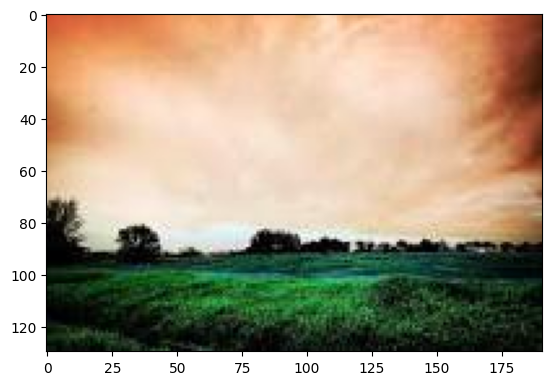

In [10]:
from sklearn.cluster import KMeans  # Importing the KMeans clustering algorithm from scikit-learn
import matplotlib.pyplot as plt  # Importing the matplotlib library for visualization
import numpy as np  # Importing the numpy library for numerical operations
import cv2  # Importing the OpenCV library for image processing
from collections import Counter  # Importing the Counter class for counting elements
from skimage.color import rgb2lab, deltaE_cie76  # Importing functions for color conversion and color difference calculation
import os  # Importing the os module for interacting with the operating system

image = cv2.imread('sample image.jpg')  # Reading the image file into a numpy array

print("The type of this input is {}".format(type(image)))  # Printing the type of the image array
print("Shape: {}".format(image.shape))  # Printing the shape of the image array

plt.imshow(image)  # Displaying the image using matplotlib
%matplotlib inline

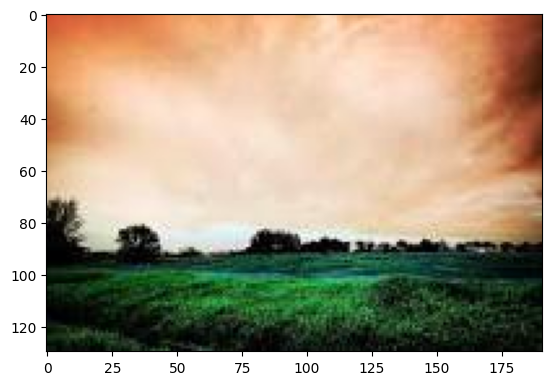

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting the color space of the image from BGR to RGB
plt.imshow(image)  # Displaying the image with the updated color space
%matplotlib inline

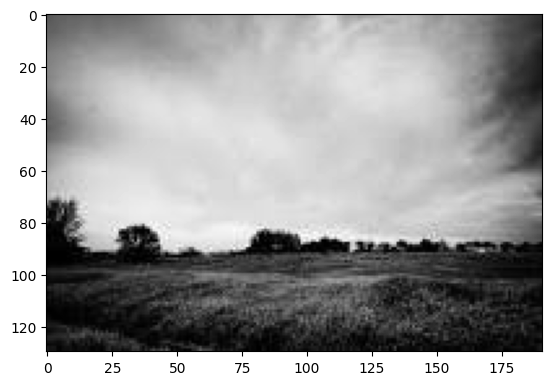

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Converting the image to grayscale
plt.imshow(gray_image, cmap='gray')  # Displaying the grayscale image with the 'gray' colormap
%matplotlib inline

COLOUR IDENTIFICATION

In [16]:
def RGB2HEX(color):
    # Convert RGB color values to hexadecimal format
    # The function takes a list or tuple of RGB values as input

    # Convert each RGB value to integer and format them as 2-digit hexadecimal strings
    # The {:02x} format specifier ensures that each component is represented by 2 digits
    hex_color = "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

    # Return the hexadecimal color string
    return hex_color

In [17]:
def get_image(image_path):
    # Function to read and preprocess an image from the specified path

    # Read the image from the given path
    image = cv2.imread(image_path)

    # Convert the color space of the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Return the preprocessed image
    return image

In [18]:
 def get_colors(image, number_of_colors, show_chart):
    # Function to extract dominant colors from an image

    # Resize the image to a standard size for consistent processing
    modified_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)

    # Reshape the image to a 2D array of pixels
    modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)

    # Apply KMeans clustering to group similar colors together
    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)

    # Count the occurrences of each label (cluster)
    counts = Counter(labels)
    # Sort the counts dictionary to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    # Get the center colors of each cluster
    center_colors = clf.cluster_centers_
    # Get the ordered colors by iterating through the keys (labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]

    # Convert the ordered colors to hexadecimal format
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    # Keep the ordered colors in RGB format
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        # Display a pie chart of the color distribution if show_chart is True
        plt.figure(figsize=(8, 6))
        plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)

    # Return the dominant colors in RGB format
    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([139.66357634, 182.72120323, 234.48542653]),
 array([39.65626911, 76.13125382, 18.52623853]),
 array([183.88243157, 211.27759052, 242.0519556 ]),
 array([ 65.4089404 , 107.95405629, 197.30656733]),
 array([ 6.06089365, 13.0745618 ,  5.70983562]),
 array([60.75051975, 82.91969854, 50.34758316]),
 array([ 84.71068376, 138.44423077,  54.33589744]),
 array([ 23.90220207,  45.46340674, 103.97733161]),
 array([113.02887717, 164.77527736, 230.52285782]),
 array([20.40154283, 37.13270692, 17.56713648]),
 array([223.81097766, 233.03995959, 236.14412392]),
 array([ 45.21006341,  73.03599918, 152.25690325]),
 array([163.74061649, 198.15981136, 238.31422598]),
 array([ 49.01337847, 113.26579626,  35.63958736]),
 array([180.87555199, 198.04295464, 200.71176234]),
 array([123.46338583, 152.50708661, 175.32125984]),
 array([37.36523227, 56.44949586, 34.75450126]),
 array([202.39576626, 222.30153378, 245.17274686]),
 array([ 90.15306667, 105.048     , 108.1376    ]),
 array([ 85.86481195, 139.8

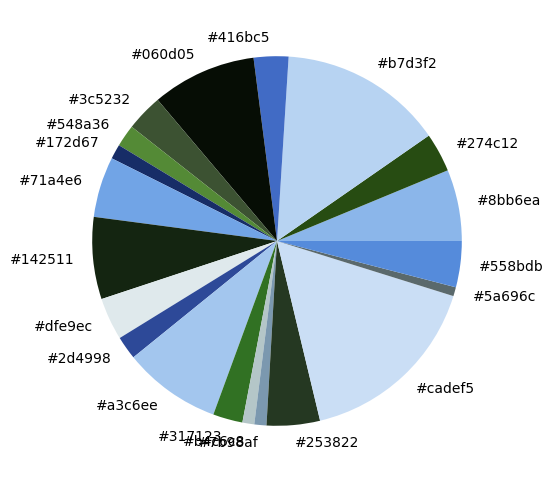

In [19]:
get_colors(get_image('sample image.jpg'), 20, True)
# Extract dominant colors from the image 'sample image.jpg' with 20 colors and display a color distribution chart